In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [136]:
## Binomial 

Normal          = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Cyber Security – Network Security\Data_of_Attack_Back_Normal.csv")
Back            = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Cyber Security – Network Security\Data_of_Attack_Back.csv")
BufferOverflow  = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Cyber Security – Network Security\Data_of_Attack_Back_BufferOverflow.csv")
FTPWrite        = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Cyber Security – Network Security\Data_of_Attack_Back_FTPWrite.csv")
GuessPassword   = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Cyber Security – Network Security\Data_of_Attack_Back_GuessPassword.csv")
Neptune         = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Cyber Security – Network Security\Data_of_Attack_Back_Neptune.csv")
Back_NMap       = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Cyber Security – Network Security\Data_of_Attack_Back_NMap.csv")
PortSweep       = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Cyber Security – Network Security\Data_of_Attack_Back_PortSweep.csv")
RootKit         = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Cyber Security – Network Security\Data_of_Attack_Back_RootKit.csv")
Satan           = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Cyber Security – Network Security\Data_of_Attack_Back_Satan.csv")
Smurf           = pd.read_csv(r"C:\Users\Harshita Sahu\OneDrive\Documents\Cyber Security – Network Security\Data_of_Attack_Back_Smurf.csv")

In [137]:
Normal['Attack']         = 1
Back['Attack']           = 0
BufferOverflow['Attack'] = 0
FTPWrite['Attack']       = 0
GuessPassword['Attack']  = 0
Neptune['Attack']        = 0
Back_NMap['Attack']      = 0
PortSweep['Attack']      = 0
RootKit['Attack']        = 0
Satan['Attack']         = 0
Smurf['Attack']          = 0

In [138]:
tabels = [Normal,Back,BufferOverflow,FTPWrite,GuessPassword,Neptune,Back_NMap,PortSweep,RootKit,Satan,Smurf]

In [139]:
column = Normal.columns
column

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

In [140]:
for i in range(len(tabels)):
    tabels[i] = tabels[i].reindex(columns = column)

In [141]:
final_tabel = pd.concat(tabels,axis = 0)

In [142]:
final_tabel['Attack'].value_counts()

Attack
1    576710
0    240840
Name: count, dtype: int64

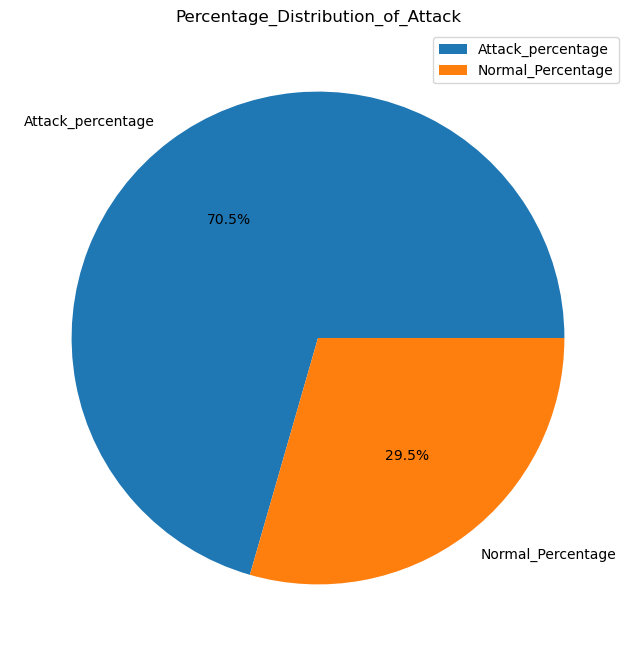

In [143]:
plt.figure(figsize=(10,8))
Attack_percentage = final_tabel[final_tabel['Attack']==1]['Attack'].count()/len(final_tabel['Attack'])
Normal_Percentage = final_tabel[final_tabel['Attack']==0]['Attack'].count()/len(final_tabel['Attack'])
dist = {'Attack_percentage' : Attack_percentage*100 , 'Normal_Percentage':Normal_Percentage*100}
plt.pie( data = dist , x= dist.values() , labels = dist.keys() ,  autopct= '%1.1f%%')
plt.title('Percentage_Distribution_of_Attack')
plt.legend()

Text(0.5, 1.0, 'Types_Of_Protocol')

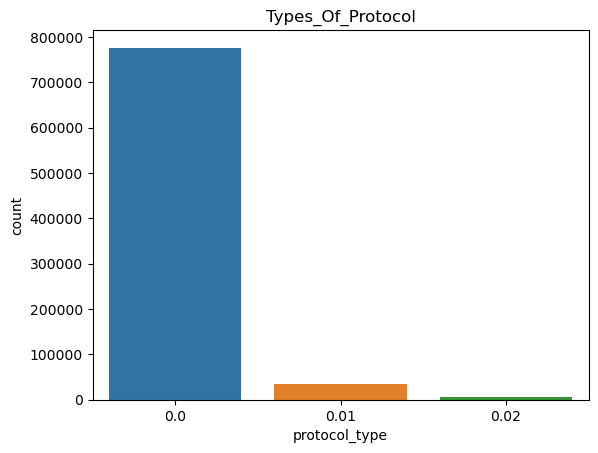

In [144]:
final_tabel.columns = final_tabel.columns.str.strip()
final_tabel['protocol_type'].value_counts()
sns.countplot(data = final_tabel , x = final_tabel['protocol_type'] )
plt.title('Types_Of_Protocol')

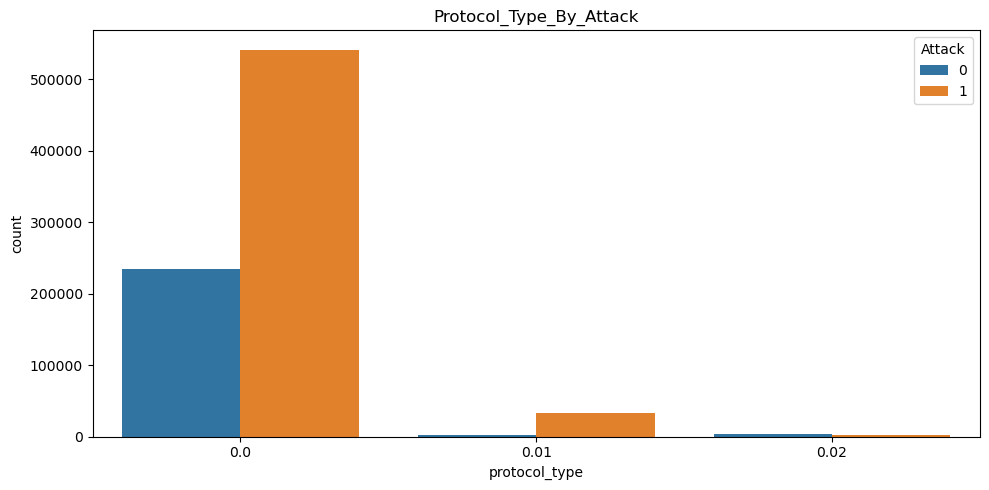

In [145]:
protocol_attack = final_tabel.groupby(['protocol_type','Attack']).size().reset_index(name = 'count')
protocol_attack['protocol_type'] = protocol_attack['protocol_type'].astype('str')
protocol_attack['Attack'] = protocol_attack['Attack'].astype('str')
plt.figure(figsize=(10,5))
sns.barplot(data = protocol_attack, x = 'protocol_type' , y = 'count' ,hue = 'Attack')
plt.title('Protocol_Type_By_Attack')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation with other columns')

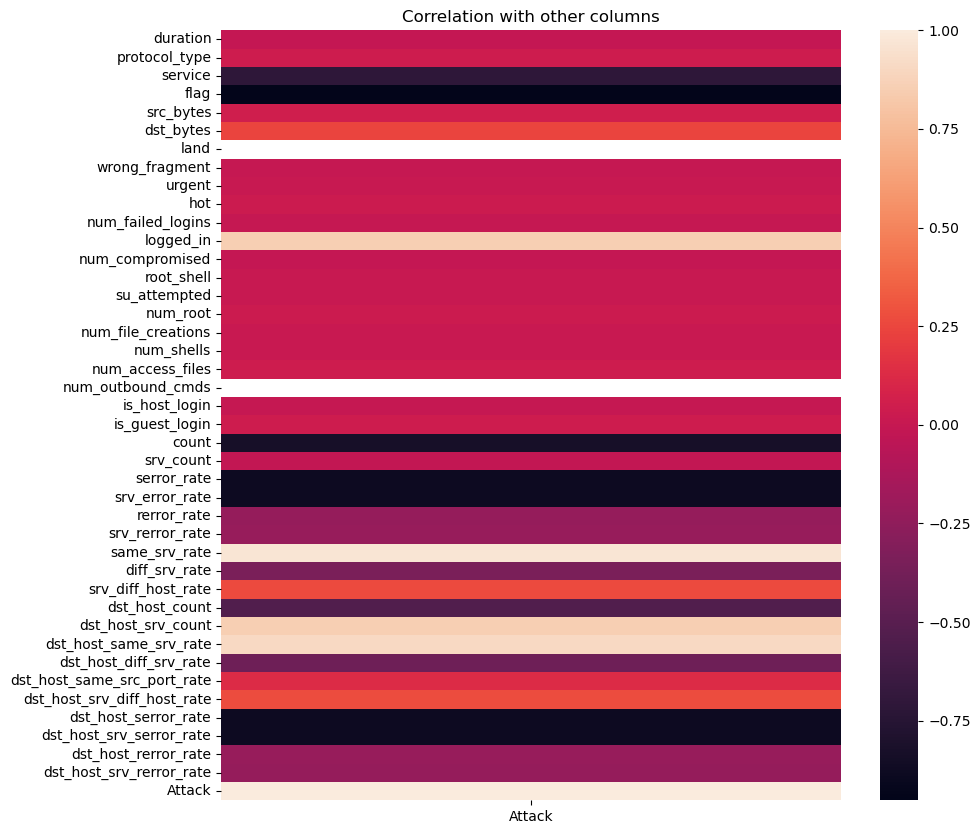

In [146]:
plt.figure(figsize = (10,10))
corr_attack = final_tabel.corr()['Attack']
sns.heatmap(corr_attack.to_frame())
plt.title('Correlation with other columns')

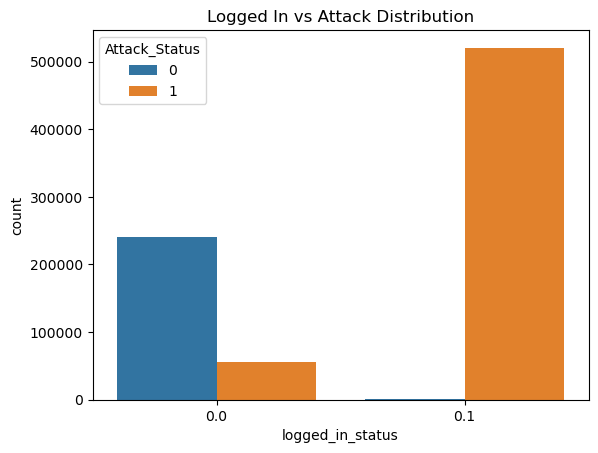

In [147]:
logged_in_by_attack = final_tabel.groupby(['logged_in','Attack']).size().reset_index(name = 'count')
logged_in_by_attack.columns
logged_in_by_attack['logged_in'] = logged_in_by_attack['logged_in'].astype('str')
logged_in_by_attack['Attack'] = logged_in_by_attack['Attack'].astype('str')
sns.barplot(x = 'logged_in' , data = logged_in_by_attack , y = 'count',hue = 'Attack' )
plt.xlabel('logged_in_status')
plt.title("Logged In vs Attack Distribution")
plt.legend(title = 'Attack_Status')

Text(0.5, 1.0, 'Service_Percentage')

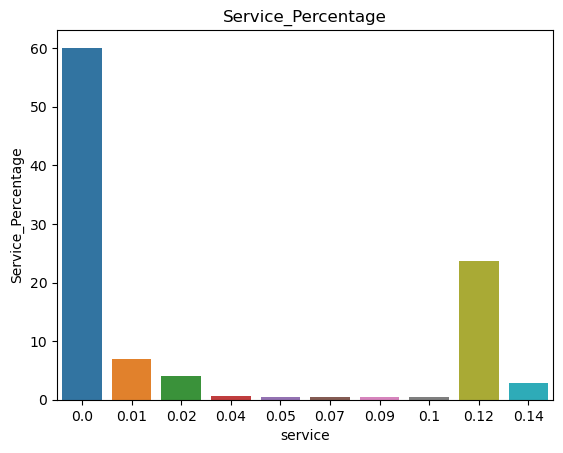

In [148]:
service_count = final_tabel['service'].value_counts().reset_index(name = 'count')
top_service = service_count.sort_values(by = 'count',ascending = False).head(10)
top_service['Service_Percentage'] = top_service['count']*100/top_service['count'].sum()
sns.barplot(data = top_service , x = 'service' , y = 'Service_Percentage')
plt.title('Service_Percentage')

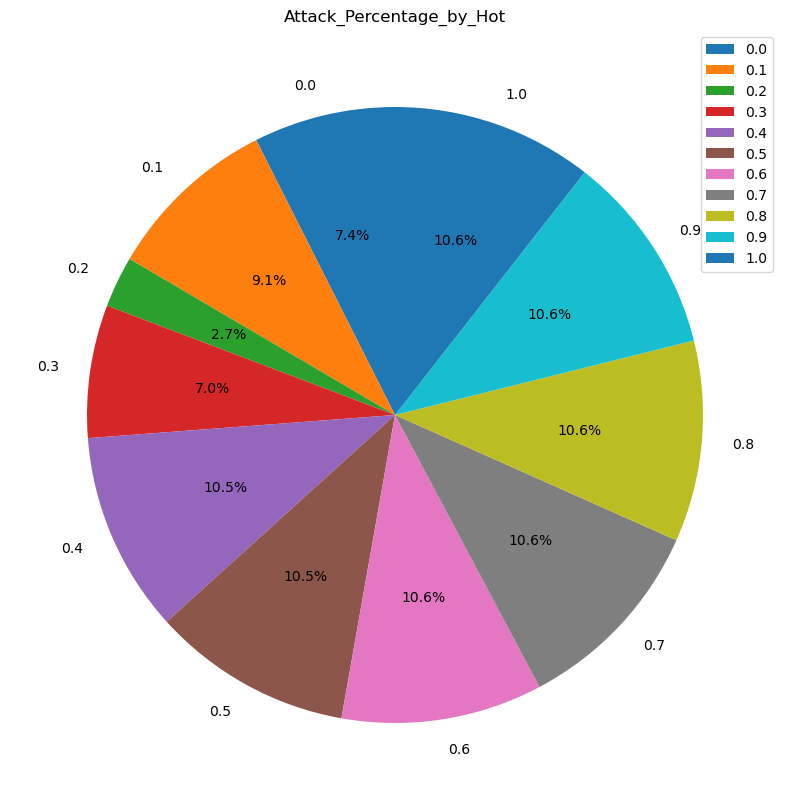

In [149]:
hot_attack = final_tabel.groupby(['hot','Attack']).size().reset_index(name = 'count')
hot_attack_pivot = pd.pivot(data = hot_attack , index = 'hot' , columns = 'Attack' , values = 'count').fillna(0)
hot_attack_pivot['rows_total'] = hot_attack_pivot.sum(axis =1)
hot_attack_pivot['Attack_Percentage'] = hot_attack_pivot[1] / hot_attack_pivot['rows_total']
hot_attack_pivot
plt.figure(figsize = (10,10))
plt.pie(data = hot_attack_pivot , x = hot_attack_pivot['Attack_Percentage'] , labels = hot_attack_pivot.index , autopct= '%1.1f%%',startangle= 90)
plt.title('Attack_Percentage_by_Hot')
plt.legend()

In [150]:
Y = final_tabel['Attack']
final_tabel = final_tabel.drop(['Attack'],axis = 1)

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(final_tabel,Y , test_size = 0.3 , random_state = 101)

In [152]:
Y_train.value_counts()

Attack
1    403519
0    168766
Name: count, dtype: int64

In [153]:
### Handling Missings for Train and Test data 

for col in X_train.columns:
    if X_train[col].nunique()<=11 :
        mode = X_train[col].mode()[0]
        X_train[col] = X_train[col].fillna(mode)
        X_test[col] = X_test[col].fillna(mode)
    else:
        mean = X_train[col].mean()
        X_train[col] = X_train[col].fillna(mean)
        X_test[col] = X_test[col].fillna(mean)

In [154]:
### Encoding for train and test 

from sklearn.preprocessing import LabelEncoder

for col in X_train.columns:
    if X_train[col].nunique()<=11:
        diff = set (X_test[col].unique()) - set(X_train[col].unique())
        if diff :
            print(f"columns {col} the data which is unseen on test data")
        else:
            label = LabelEncoder()
            X_train[col] = label.fit_transform(X_train[col])
            X_test[col] = label.transform(X_test[col])


columns wrong_fragment the data which is unseen on test data
columns hot the data which is unseen on test data
columns num_failed_logins the data which is unseen on test data
columns num_access_files the data which is unseen on test data


In [155]:
### One_Hot Encoding on Unseen data 

from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(handle_unknown = 'ignore' , sparse_output = False)

columns = ['wrong_fragment','hot','num_failed_logins','num_access_files']

df_train = pd.DataFrame(one_hot.fit_transform(X_train[columns]) , columns = one_hot.get_feature_names_out(columns) , index  = X_train.index)
df_test = pd.DataFrame(one_hot.transform(X_test[columns]) , columns = one_hot.get_feature_names_out(columns) , index  = X_test.index)

X_train.drop(['wrong_fragment','hot','num_failed_logins','num_access_files'],axis = 1 ,inplace = True)
X_test.drop(['wrong_fragment','hot','num_failed_logins','num_access_files'],axis = 1 ,inplace = True)

X_train = pd.concat([X_train,df_train],axis = 1)
X_test = pd.concat([X_test,df_test],axis = 1)

In [156]:
### SMOTE 

import imblearn
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state = 101)
X_train_res,Y_train_res = smote.fit_resample(X_train,Y_train)
#X_train_res = pd.DataFrame(X_train_res , columns = X_train.columns())

In [157]:
### Outlier for both train and test

for col in X_train_res.columns:
    lower = X_train_res[col].quantile(0.01)
    upper = X_train_res[col].quantile(0.99)
    X_train_res[col] = X_train_res[col].clip(lower = lower , upper =  upper)
    X_test[col] = X_test[col].clip(lower = lower , upper = upper)


In [158]:
### Scaling on both train and test data 

from sklearn.preprocessing import StandardScaler
std = StandardScaler()


X_train_res  = pd.DataFrame(std.fit_transform(X_train_res) , columns = X_train_res.columns)
X_test_scaled = pd.DataFrame(std.transform(X_test) , columns = X_test.columns)

In [159]:
from xgboost import XGBClassifier

In [160]:
from sklearn.feature_selection import RFE,SelectKBest
from sklearn.ensemble import GradientBoostingClassifier

rfe = RFE(estimator = XGBClassifier() , n_features_to_select = 30)

rfe.fit(X_train_res,Y_train_res)

selected_columns = X_train_res.columns[rfe.support_]
selected_columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'urgent', 'logged_in', 'num_compromised',
       'root_shell', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [161]:
select_k = SelectKBest( k = 30)
select_k.fit(X_train_res,Y_train_res)

selected_col_select_k =  X_train_res.columns[select_k.get_support()]
selected_col_select_k

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'num_access_files_0.3',
       'num_access_files_0.4', 'num_access_files_0.6', 'num_access_files_0.7'],
      dtype='object')

In [162]:
selected_col = list(set(list(list(selected_columns)+list(selected_col_select_k))))

In [163]:
cleaned_data = X_train_res[selected_col]
cleaned_data

,srv_error_rate,dst_host_serror_rate,same_srv_rate,logged_in,dst_host_diff_srv_rate,num_access_files_0.4,duration,srv_diff_host_rate,dst_bytes,srv_count,...,rerror_rate,num_access_files_0.7,dst_host_srv_diff_host_rate,dst_host_same_src_port_rate,num_compromised,urgent,flag,protocol_type,root_shell,srv_rerror_rate
0,-0.855764,-0.855386,0.966344,1.096967,-0.623834,0.0,-0.141998,-0.352831,0.582794,-0.211508,...,-0.289237,0.0,1.218371,-0.246330,0.0,0.0,-0.983032,-0.21034,0.0,-0.286791
1,1.172188,1.176668,-1.107347,-0.911605,0.189273,0.0,-0.141998,-0.352831,-0.393571,-0.456129,...,-0.289237,0.0,-0.474543,-0.305612,0.0,0.0,1.078298,-0.21034,0.0,-0.286791
2,-0.855764,-0.855386,-0.999342,-0.911605,0.324791,0.0,-0.141998,-0.352831,-0.393571,0.461200,...,3.514860,0.0,-0.474543,-0.305612,0.0,0.0,0.489347,-0.21034,0.0,3.529309
3,-0.855764,-0.855386,-0.113704,-0.911605,4.119293,0.0,-0.141998,-0.352831,-0.393571,-0.700750,...,3.514860,0.0,-0.474543,1.650683,0.0,0.0,0.489347,-0.21034,0.0,3.529309
4,-0.855764,-0.855386,0.966344,1.096967,-0.623834,0.0,-0.141998,-0.352831,-0.280000,-0.578440,...,-0.289237,0.0,-0.474543,-0.305612,0.0,0.0,-0.983032,-0.21034,0.0,-0.286791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807033,-0.855764,-0.855386,-1.107347,-0.911605,0.370872,0.0,-0.141998,-0.352831,-0.393571,-0.272663,...,3.514860,0.0,-0.474543,-0.305612,0.0,0.0,0.489347,-0.21034,0.0,3.529309
807034,1.172188,1.176668,-0.740131,-0.911605,0.189273,0.0,-0.141998,-0.352831,-0.393571,0.216579,...,-0.289237,0.0,-0.474543,-0.305612,0.0,0.0,1.078298,-0.21034,0.0,-0.286791
807035,1.172188,1.176668,-1.042544,-0.911605,0.519005,0.0,-0.141998,-0.352831,-0.393571,0.365377,...,-0.289237,0.0,-0.474543,-0.305612,0.0,0.0,1.078298,-0.21034,0.0,-0.286791
807036,1.172188,1.176668,-0.891338,-0.911605,0.520237,0.0,-0.141998,-0.352831,-0.393571,-0.578440,...,-0.289237,0.0,-0.474543,-0.305612,0.0,0.0,1.078298,-0.21034,0.0,-0.286791


In [164]:
cleaned_data = cleaned_data.drop(['num_access_files_0.6','root_shell','num_compromised','num_access_files_0.7','urgent','land','num_access_files_0.4','num_access_files_0.3'],axis = 1)

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.DataFrame()
df['features'] = cleaned_data.columns
df['vif'] = [ variance_inflation_factor(cleaned_data.values,i) for i in range(len(cleaned_data.columns))]

In [166]:
df

,features,vif
0,srv_error_rate,818.629647
1,dst_host_serror_rate,401.579336
2,same_srv_rate,31.779378
3,logged_in,37.476472
4,dst_host_diff_srv_rate,2.846757
5,duration,1.156134
6,srv_diff_host_rate,1.240640
7,dst_bytes,1.266625
8,srv_count,1.753212
9,diff_srv_rate,2.177002


In [167]:
cleaned_data

,srv_error_rate,dst_host_serror_rate,same_srv_rate,logged_in,dst_host_diff_srv_rate,duration,srv_diff_host_rate,dst_bytes,srv_count,diff_srv_rate,...,src_bytes,dst_host_rerror_rate,dst_host_srv_serror_rate,count,rerror_rate,dst_host_srv_diff_host_rate,dst_host_same_src_port_rate,flag,protocol_type,srv_rerror_rate
0,-0.855764,-0.855386,0.966344,1.096967,-0.623834,-0.141998,-0.352831,0.582794,-0.211508,-0.405410,...,0.103115,-0.292265,-0.85431,-0.831619,-0.289237,1.218371,-0.246330,-0.983032,-0.21034,-0.286791
1,1.172188,1.176668,-1.107347,-0.911605,0.189273,-0.141998,-0.352831,-0.393571,-0.456129,0.045645,...,-0.402651,-0.292265,1.17291,0.489052,-0.289237,-0.474543,-0.305612,1.078298,-0.21034,-0.286791
2,-0.855764,-0.855386,-0.999342,-0.911605,0.324791,-0.141998,-0.352831,-0.393571,0.461200,0.135856,...,-0.402651,3.589326,-0.85431,1.343019,3.514860,-0.474543,-0.305612,0.489347,-0.21034,3.529309
3,-0.855764,-0.855386,-0.113704,-0.911605,4.119293,-0.141998,-0.352831,-0.393571,-0.700750,8.525475,...,-0.402651,0.988660,-0.85431,-0.901128,3.514860,-0.474543,1.650683,0.489347,-0.21034,3.529309
4,-0.855764,-0.855386,0.966344,1.096967,-0.623834,-0.141998,-0.352831,-0.280000,-0.578440,-0.405410,...,0.037223,-0.292265,-0.85431,-0.891198,-0.289237,-0.474543,-0.305612,-0.983032,-0.21034,-0.286791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807033,-0.855764,-0.855386,-1.107347,-0.911605,0.370872,-0.141998,-0.352831,-0.393571,-0.272663,0.226067,...,-0.402651,3.589326,-0.85431,1.289993,3.514860,-0.474543,-0.305612,0.489347,-0.21034,3.529309
807034,1.172188,1.176668,-0.740131,-0.911605,0.189273,-0.141998,-0.352831,-0.393571,0.216579,0.118549,...,-0.402651,-0.292265,1.17291,-0.158294,-0.289237,-0.474543,-0.305612,1.078298,-0.21034,-0.286791
807035,1.172188,1.176668,-1.042544,-0.911605,0.519005,-0.141998,-0.352831,-0.393571,0.365377,0.135856,...,-0.402651,-0.292265,1.17291,1.750143,-0.289237,-0.474543,-0.305612,1.078298,-0.21034,-0.286791
807036,1.172188,1.176668,-0.891338,-0.911605,0.520237,-0.141998,-0.352831,-0.393571,-0.578440,1.308598,...,-0.402651,-0.292265,1.17291,-0.712461,-0.289237,-0.474543,-0.305612,1.078298,-0.21034,-0.286791


In [168]:
X_test_scaled = X_test_scaled[cleaned_data.columns]

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

rand = RandomForestClassifier(n_estimators=100,random_state = 101)
rand.fit(cleaned_data , Y_train_res)

y_pre_rand = rand.predict(cleaned_data)
print(classification_report(Y_train_res,y_pre_rand))
print(confusion_matrix(Y_train_res,y_pre_rand))

y_pre_rand_test = rand.predict(X_test_scaled)
print(classification_report(Y_test,y_pre_rand_test))
print(confusion_matrix(Y_test,y_pre_rand_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    403519
           1       1.00      1.00      1.00    403519

    accuracy                           1.00    807038
   macro avg       1.00      1.00      1.00    807038
weighted avg       1.00      1.00      1.00    807038

[[403519      0]
 [     1 403518]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72074
           1       1.00      1.00      1.00    173191

    accuracy                           1.00    245265
   macro avg       1.00      1.00      1.00    245265
weighted avg       1.00      1.00      1.00    245265

[[ 72054     20]
 [     1 173190]]


In [170]:
##### Multinomial 

In [171]:
Normal['Attack'] = 'Normal'

In [172]:
Back['Attack']           = 'Back'
BufferOverflow['Attack'] = 'BufferOverflow'
FTPWrite['Attack']       = 'FTPWrite'
GuessPassword['Attack']  = 'GuessPassword'
Neptune['Attack']        = 'Neptune'
Back_NMap['Attack']      = 'Back_NMap'
PortSweep['Attack']      = 'PortSweep'
RootKit['Attack']        = 'RootKit'
Satan['Attack']         = 'Satan'
Smurf['Attack']          = 'Smurf'

In [173]:
full_table = [Normal,Back,BufferOverflow,FTPWrite,GuessPassword,Neptune,Back_NMap,PortSweep,RootKit,Satan,Smurf]

In [174]:
column = Normal.columns
column

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

In [175]:
for col in range(len(full_table)):
    full_table[col] = full_table[col].reindex(columns = column)

In [176]:
range(len(full_table))

range(0, 11)

In [177]:
full_table = pd.concat(full_table,axis = 0)

In [178]:
full_table.columns =full_table.columns.str.strip()

In [179]:
full_table

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.00,0.00,0.0,0.00215,0.45076,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,Normal
1,0.0,0.00,0.00,0.0,0.00162,0.04528,0.0,0.0,0.0,0.0,...,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,Normal
2,0.0,0.00,0.00,0.0,0.00236,0.01228,0.0,0.0,0.0,0.0,...,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,Normal
3,0.0,0.00,0.00,0.0,0.00233,0.02032,0.0,0.0,0.0,0.0,...,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,Normal
4,0.0,0.00,0.00,0.0,0.00239,0.00486,0.0,0.0,0.0,0.0,...,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,Smurf
3003,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Smurf
3004,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Smurf
3005,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,Smurf


In [180]:
value_counts_Attack = full_table['Attack'].value_counts()

In [181]:
value_counts_Attack

Attack
Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
Back_NMap           1554
Back                 968
GuessPassword         53
BufferOverflow        30
RootKit               10
FTPWrite               7
Name: count, dtype: int64

In [182]:
full_table['Attack'].unique()

array(['Normal', 'Back', 'BufferOverflow', 'FTPWrite', 'GuessPassword',
       'Neptune', 'Back_NMap', 'PortSweep', 'RootKit', 'Satan', 'Smurf'],
      dtype=object)

In [183]:
merge_col =['GuessPassword', 'BufferOverflow', 'RootKit', 'FTPWrite']

In [184]:
other_attack = [x for  x in full_table['Attack'].unique() if x in merge_col]

In [185]:
full_table['Attack'] = full_table['Attack'].apply([lambda x:'Other_Network' if x in other_attack else x])

In [186]:
full_table['Attack'].value_counts()

Attack
Normal           576710
Neptune          227228
Satan              5019
Smurf              3007
PortSweep          2964
Back_NMap          1554
Back                968
Other_Network       100
Name: count, dtype: int64

Text(0, 0.5, 'Count')

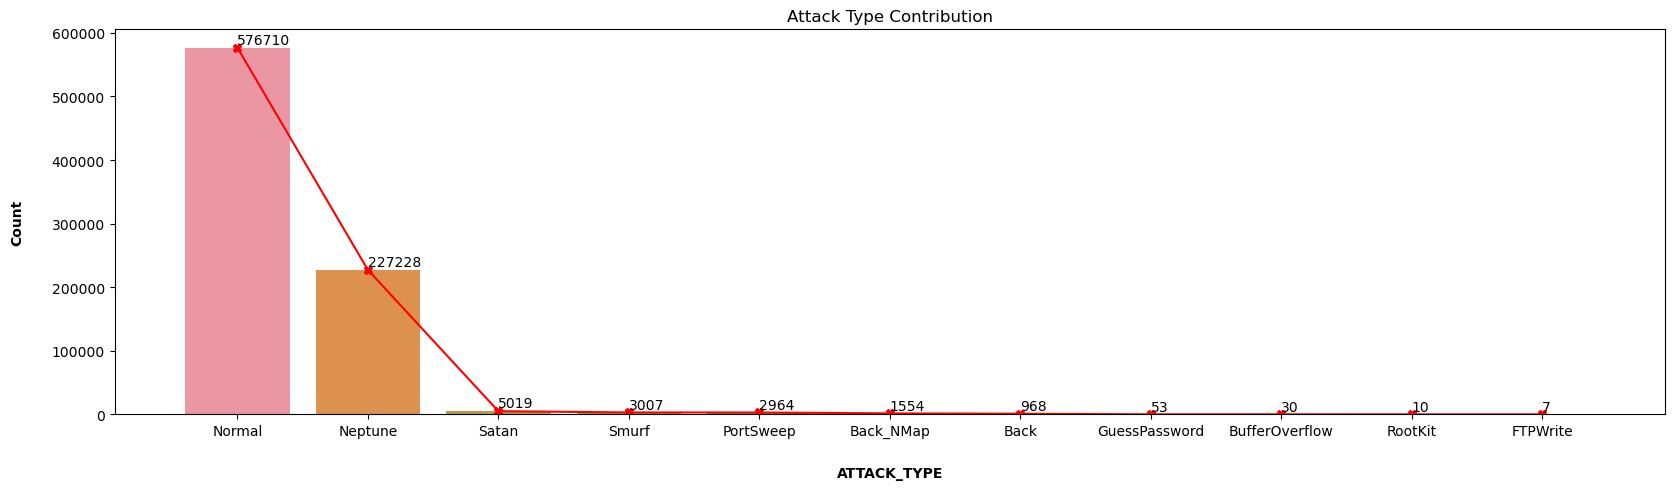

In [187]:
plt.figure(figsize = (20,5))
sns.barplot( x = value_counts_Attack.index , y = value_counts_Attack.values)
plt.plot(range(len(value_counts_Attack)), value_counts_Attack.values , marker = 'X' , color = 'red')

for i,val in enumerate(value_counts_Attack.values):
    plt.text(i,val+ (0.01*max((value_counts_Attack).values)),str(val))

plt.title('Attack Type Contribution')
plt.xlabel('ATTACK_TYPE',labelpad = 20,fontweight = 'bold')
plt.ylabel('Count',labelpad = 20 , fontweight = 'bold')

In [188]:
full_table.nunique()

duration                         918
protocol_type                      3
service                           67
flag                              11
src_bytes                       5908
dst_bytes                      18398
land                               1
wrong_fragment                     2
urgent                             5
hot                               11
num_failed_logins                  6
logged_in                          2
num_compromised                   11
root_shell                         2
su_attempted                       3
num_root                          11
num_file_creations                11
num_shells                         3
num_access_files                   9
num_outbound_cmds                  1
is_host_login                      2
is_guest_login                     2
count                            512
srv_count                        512
serror_rate                       96
srv_error_rate                    75
rerror_rate                       85
s

In [189]:
categorical_col = []
for col in full_table.columns:
    if full_table[col].nunique()<=11:
        categorical_col.append(col)

In [190]:
categorical_col

['protocol_type',
 'flag',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'Attack']

In [191]:
protocol_type_value_counts = full_table.groupby('protocol_type')['Attack'].count()
protocol_type_value_counts

protocol_type
0.00    776558
0.01     35402
0.02      5583
Name: Attack, dtype: int64

Text(0.5, 1.0, 'Protocol_Type_Distribution')

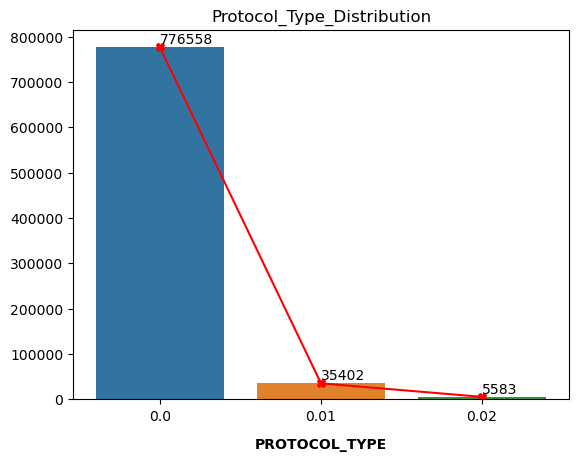

In [192]:
sns.barplot(x = protocol_type_value_counts.index , y = protocol_type_value_counts.values)
plt.plot(range(len(protocol_type_value_counts.index)),protocol_type_value_counts.values,color = 'red',marker = 'X')

for i,val in enumerate(protocol_type_value_counts.values):
    plt.text(i,val+(0.01*max(protocol_type_value_counts.values)), str(val))

plt.xlabel('PROTOCOL_TYPE',fontweight = 'bold',labelpad = 10)
plt.title('Protocol_Type_Distribution')

In [193]:
protocol_type_value_counts.index

Index([0.0, 0.01, 0.02], dtype='float64', name='protocol_type')

In [194]:
stacked = pd.crosstab(full_table['Attack'] , full_table['protocol_type'])

Text(0.5, 1.0, 'Attack_Type_By_Protocol_Distribution')

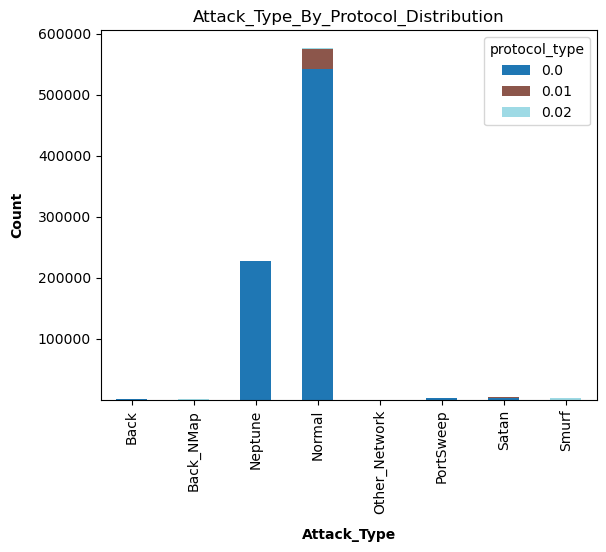

In [195]:
stacked.plot(kind = 'bar' , stacked = True,colormap='tab20')
plt.xlabel('Attack_Type',fontweight = 'bold',labelpad = 10)
plt.ylabel('Count',fontweight = 'bold',labelpad = 10)
plt.title('Attack_Type_By_Protocol_Distribution')

In [196]:
flag_counts = full_table['flag'].value_counts()

<Axes: xlabel='flag', ylabel='count'>

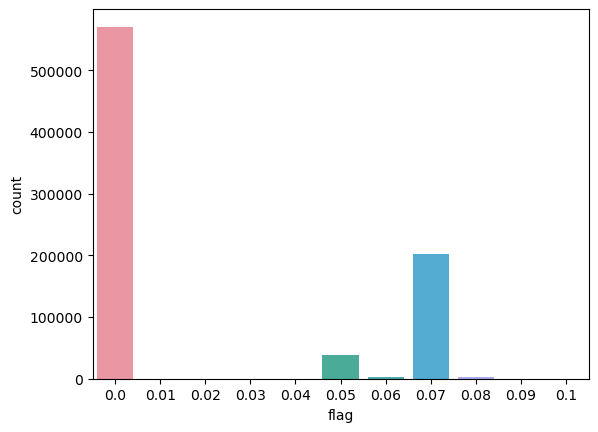

In [197]:
sns.countplot(data = full_table , x = full_table['flag'])

In [198]:
num_failed_logins_count = full_table.groupby(['num_failed_logins','Attack']).size().reset_index(name = 'count')
num_failed_logins_count

,num_failed_logins,Attack,count
0,0.0,Back,968
1,0.0,Back_NMap,1554
2,0.0,Neptune,227228
3,0.0,Normal,576661
4,0.0,Other_Network,40
5,0.0,PortSweep,2964
6,0.0,Satan,5018
7,0.0,Smurf,3007
8,0.1,Normal,38
9,0.1,Other_Network,52


In [199]:
num_failed_logins_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_failed_logins  15 non-null     float64
 1   Attack             15 non-null     object 
 2   count              15 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 492.0+ bytes


<Axes: xlabel='Attack'>

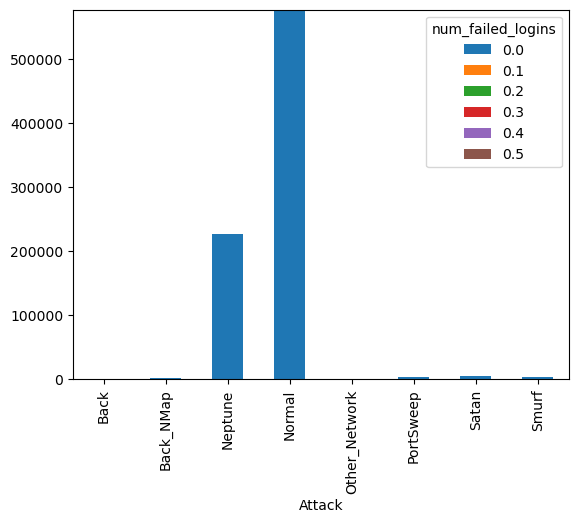

In [200]:
stack_num_failed_login = pd.crosstab(full_table['Attack'] , full_table['num_failed_logins'])
stack_num_failed_login.plot(kind = 'bar' , stacked  = True) 

In [201]:
num_failed_logins_count['Attack'] = num_failed_logins_count['Attack'].astype(str)
num_failed_logins_count['num_failed_logins'] = num_failed_logins_count['num_failed_logins'].astype(str)

Text(0, 0.5, 'Counts')

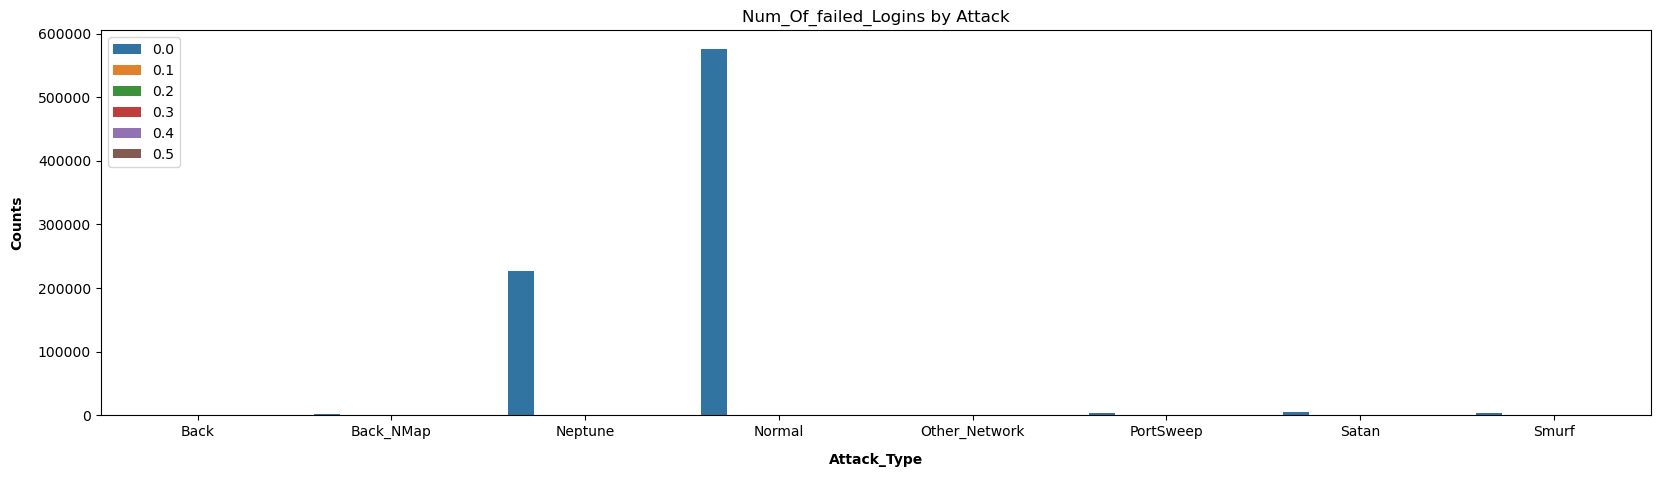

In [202]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'Attack' , y = 'count',hue = 'num_failed_logins', data = num_failed_logins_count)
plt.legend(loc = 'upper left')
plt.title('Num_Of_failed_Logins by Attack')
plt.xlabel('Attack_Type',fontweight = 'bold',labelpad = 10)
plt.ylabel('Counts',fontweight = 'bold' , labelpad =10)

In [203]:
duration_hours = full_table['duration']/3600

In [204]:
hot_attack = full_table.groupby(['hot','Attack']).size().reset_index(name = 'count')

In [205]:
import warnings
warnings.filterwarnings("ignore")

In [206]:
hot_attack['hot'] = hot_attack['hot'].astype(str)

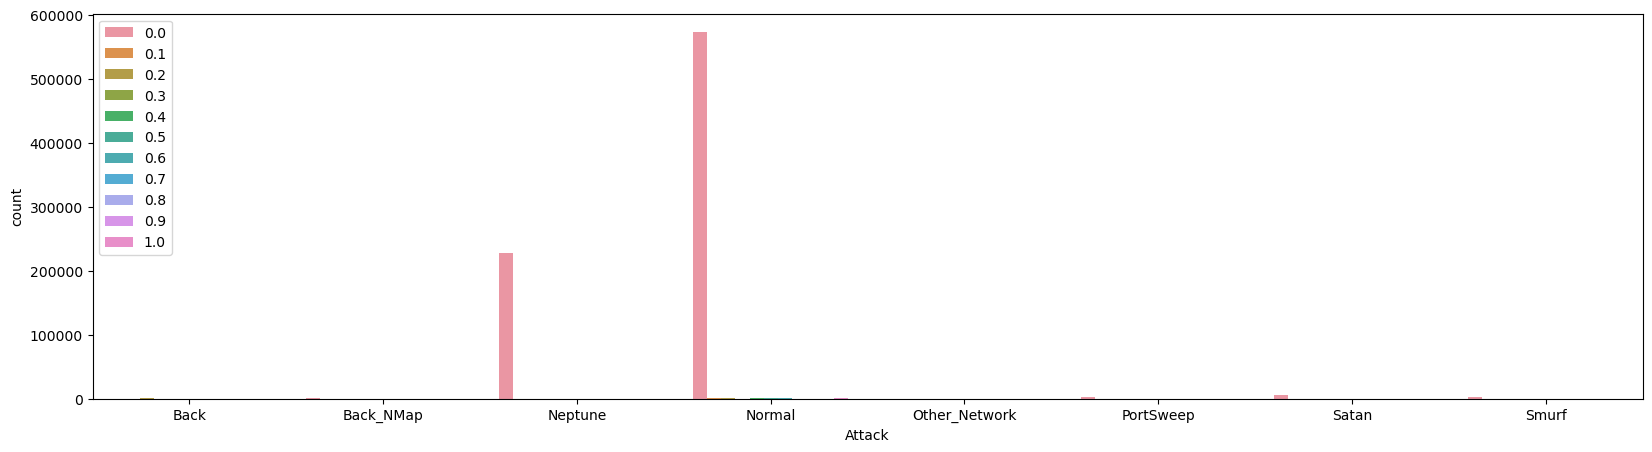

In [207]:
plt.figure(figsize = (20,5))
sns.barplot(data =hot_attack, x = 'Attack',y = 'count',hue = 'hot')
plt.legend(loc='upper left')

In [208]:
## Encoding Y variables
Target = full_table['Attack']

full_table = full_table.drop(['Attack'],axis = 1)

In [209]:
## Missing_data 
for col in full_table.columns:
    if full_table[col].nunique()<=11:
        full_table[col] = full_table[col].fillna(full_table[col].mode()[0])
    else:
        full_table[col] = full_table[col].fillna(full_table[col].mean())
    

In [210]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817550 entries, 0 to 3006
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817550 non-null  float64
 1   protocol_type                817550 non-null  float64
 2   service                      817550 non-null  float64
 3   flag                         817550 non-null  float64
 4   src_bytes                    817550 non-null  float64
 5   dst_bytes                    817550 non-null  float64
 6   land                         817550 non-null  float64
 7   wrong_fragment               817550 non-null  float64
 8   urgent                       817550 non-null  float64
 9   hot                          817550 non-null  float64
 10  num_failed_logins            817550 non-null  float64
 11  logged_in                    817550 non-null  float64
 12  num_compromised              817550 non-null  float64
 13  root_s

In [211]:
## Outliers
for col in full_table.columns:
    if full_table[col].nunique()>11:
        full_table[col]= full_table[col].clip(lower = full_table[col].quantile(0.01) , upper = full_table[col].quantile(0.99))

In [212]:
## Target V/S X_Variables


#X = full_table.drop(['Attack'],axis = 1)


In [213]:
full_table


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.00,0.00,0.0,0.00215,0.30933,0.0,0.0,0.0,0.0,...,0.001,0.001,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.0,0.00162,0.04528,0.0,0.0,0.0,0.0,...,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.0,0.00236,0.01228,0.0,0.0,0.0,0.0,...,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,0.00,0.0,0.00233,0.02032,0.0,0.0,0.0,0.0,...,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00,0.00,0.0,0.00239,0.00486,0.0,0.0,0.0,0.0,...,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0
3003,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0
3004,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0
3005,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,...,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0


In [214]:
## Encoding X_variables

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label_col = ['protocol_type','flag','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login']

label_encoder_X = full_table[label_col].apply(label.fit_transform)
label_Y = label.fit_transform(Target)

In [215]:
#full_table = full_table.drop(['Attack'],axis = 1)

In [216]:
### Standard Scaler 

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled_X_data = pd.DataFrame(std.fit_transform(full_table),columns = full_table.columns)

In [217]:
### Variance Inflation Factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = full_table.columns
vif['variance_inflation_factor'] = [variance_inflation_factor(full_table.values,i) for i in range(len(full_table.columns))]

In [218]:
full_table = full_table.drop(['land','num_outbound_cmds','srv_error_rate','dst_host_srv_serror_rate','serror_rate','dst_host_serror_rate'],axis = 1)

In [219]:
### Feature_Selection (SELECTKBEST)

from sklearn.feature_selection import SelectKBest

select = SelectKBest(k = 20)

select.fit(full_table,label_Y)
select_k_col = full_table.columns[select.get_support()]

In [220]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(estimator= RandomForestClassifier(class_weight = 'balanced') ,n_features_to_select = 20 )

rfe.fit(full_table,label_Y)
rfe_col = full_table.columns[rfe.support_]

In [221]:
selec_col = list(set(list(select_k_col) + list(rfe_col)))

In [222]:
full_table = full_table[selec_col]

In [223]:
full_table.columns[full_table.columns.duplicated()]

Index([], dtype='object')

In [224]:
select_col = ['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'count',
 'srv_count',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_failed_logins',
 'logged_in',
 'count',
 'srv_count',
 'rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [225]:
full_table = full_table[select_col]
full_table.columns[full_table.columns.duplicated() == False]

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'num_failed_logins',
       'logged_in', 'num_compromised', 'count', 'srv_count', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate', 'dst_bytes',
       'hot', 'dst_host_rerror_rate'],
      dtype='object')

In [226]:
col = full_table.columns.drop_duplicates()
col

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'num_failed_logins',
       'logged_in', 'num_compromised', 'count', 'srv_count', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate', 'dst_bytes',
       'hot', 'dst_host_rerror_rate'],
      dtype='object')

In [227]:
full_table[col]

,protocol_type,protocol_type,service,service,flag,flag,src_bytes,src_bytes,num_failed_logins,num_failed_logins,...,dst_host_diff_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_rerror_rate,dst_bytes,hot,dst_host_rerror_rate
0,0.00,0.00,0.00,0.00,0.0,0.0,0.00215,0.00215,0.0,0.0,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.30933,0.0,0.0
1,0.00,0.00,0.00,0.00,0.0,0.0,0.00162,0.00162,0.0,0.0,...,0.000,0.000,0.100,0.100,0.0,0.0,0.0,0.04528,0.0,0.0
2,0.00,0.00,0.00,0.00,0.0,0.0,0.00236,0.00236,0.0,0.0,...,0.000,0.000,0.050,0.050,0.0,0.0,0.0,0.01228,0.0,0.0
3,0.00,0.00,0.00,0.00,0.0,0.0,0.00233,0.00233,0.0,0.0,...,0.000,0.000,0.033,0.033,0.0,0.0,0.0,0.02032,0.0,0.0
4,0.00,0.00,0.00,0.00,0.0,0.0,0.00239,0.00239,0.0,0.0,...,0.000,0.000,0.025,0.025,0.0,0.0,0.0,0.00486,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.02,0.02,0.09,0.09,0.0,0.0,0.01032,0.01032,0.0,0.0,...,0.001,0.001,0.098,0.098,0.0,0.0,0.0,0.00000,0.0,0.0
3003,0.02,0.02,0.09,0.09,0.0,0.0,0.01032,0.01032,0.0,0.0,...,0.001,0.001,0.099,0.099,0.0,0.0,0.0,0.00000,0.0,0.0
3004,0.02,0.02,0.09,0.09,0.0,0.0,0.01032,0.01032,0.0,0.0,...,0.001,0.001,0.099,0.099,0.0,0.0,0.0,0.00000,0.0,0.0
3005,0.02,0.02,0.09,0.09,0.0,0.0,0.01032,0.01032,0.0,0.0,...,0.001,0.001,0.100,0.100,0.0,0.0,0.0,0.00000,0.0,0.0


##Resampling the Data Without Oversampling

In [228]:
from sklearn.model_selection import train_test_split
train_X,test_X, train_Y,test_Y = train_test_split(full_table,label_Y,test_size = 0.2,random_state = 101,stratify=label_Y)

In [229]:
np.unique(label_Y,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([   968,   1554, 227228, 576710,    100,   2964,   5019,   3007],
       dtype=int64))

In [231]:
from sklearn.utils.class_weight import compute_class_weight
classes_ = np.unique(train_Y) 

clas = compute_class_weight(class_weight = 'balanced' , classes = classes_ , y = train_Y)
class_weight_dict = dict(zip(classes_,clas))
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , roc_auc_score , accuracy_score,precision_score
rand = RandomForestClassifier(n_estimators=100 , random_state= 101,class_weight=class_weight_dict)
rand.fit(train_X,train_Y)
predict_train_Y = rand.predict(train_X)

print('classification_report_train :' , classification_report(train_Y,predict_train_Y))

predict_test_Y = rand.predict(test_X)
print('classification_report_test :', classification_report(test_Y,predict_test_Y))

classification_report_train :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       775
           1       1.00      1.00      1.00      1243
           2       1.00      1.00      1.00    181782
           3       1.00      1.00      1.00    461368
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00      2371
           6       1.00      1.00      1.00      4015
           7       1.00      1.00      1.00      2406

    accuracy                           1.00    654040
   macro avg       1.00      1.00      1.00    654040
weighted avg       1.00      1.00      1.00    654040

classification_report_test :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       311
           2       1.00      1.00      1.00     45446
           3       1.00      1.00      1.00    115342
           4       

In [232]:
predict_test_Y = rand.predict(test_X)
print('classification_report_test :', classification_report(test_Y,predict_test_Y))

classification_report_test :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       311
           2       1.00      1.00      1.00     45446
           3       1.00      1.00      1.00    115342
           4       1.00      0.85      0.92        20
           5       1.00      0.99      1.00       593
           6       1.00      0.99      1.00      1004
           7       1.00      1.00      1.00       601

    accuracy                           1.00    163510
   macro avg       1.00      0.98      0.99    163510
weighted avg       1.00      1.00      1.00    163510



In [233]:
from sklearn.metrics import confusion_matrix,precision_score

print(confusion_matrix(test_Y,predict_test_Y))


[[   193      0      0      0      0      0      0      0]
 [     0    310      0      1      0      0      0      0]
 [     0      0  45445      1      0      0      0      0]
 [     0      0      1 115340      0      0      1      0]
 [     0      0      0      3     17      0      0      0]
 [     0      1      0      4      0    588      0      0]
 [     0      0      0      6      0      0    998      0]
 [     0      0      0      0      0      0      0    601]]
